In [1]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk("C:\\Users\\sucha\\Downloads\\PRODIGY_ML_04"):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if path.endswith("png"):
            imagepaths.append(path)

print(len(imagepaths))


40000


In [2]:
#Defining a function that plots the image selected from a path

def img_plot(img_path):
    img = cv2.imread(img_path)
    #convert to RGB space
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #check the shape of the image
    print("Shape of the image is ", img_rgb.shape)
    #Display the image
    plt.grid(False)
    plt.imshow(img_rgb)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image " + img_path)

Shape of the image is  (240, 640)


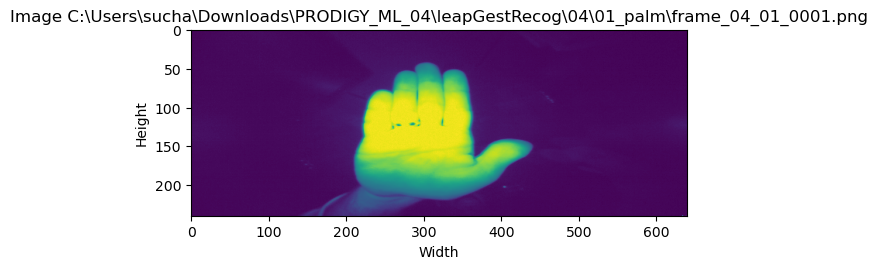

In [3]:
#Example image plot
#Plotting the first image from the dataset
img_plot(imagepaths[8000])

In [4]:
import os
import cv2
import numpy as np

#### Creating Training Set and Labels ####
# X for image data
X = []
# y for the labels
y = []

# Load the images into X by doing the necessary conversions and resizing of images
# Resizing is done to reduce the size of image to increase the speed of training
for path in imagepaths[:19999]:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    X.append(img)
    
    # Getting the labels from the image path
    # Split the path using the correct separator
    category = path.split("\\")[-2]  # Assuming the category is in the second last part of the path
    try:
        label = int(category.split("_")[0][1])
    except (IndexError, ValueError) as e:
        print(f"Error processing path {path}: {e}")
        continue
    y.append(label)

# Turning X & y into numpy arrays
X = np.array(X)
X = X.reshape(len(X), 128, 128, 1)  # Use len(X) to avoid issues if images were skipped
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0])  # To debug


Images loaded:  19999
Labels loaded:  19999
1 C:\Users\sucha\Downloads\PRODIGY_ML_04\leapGestRecog\00\01_palm\frame_00_01_0001.png


In [5]:
threshold = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = threshold, random_state = 42)

In [6]:
# Create a CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\sucha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, 
         validation_data=(X_test, y_test))

Epoch 1/5
219/219 - 124s - 566ms/step - accuracy: 0.8439 - loss: 0.6998 - val_accuracy: 0.9958 - val_loss: 0.0146
Epoch 2/5
219/219 - 121s - 553ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.9975 - val_loss: 0.0086
Epoch 3/5
219/219 - 113s - 515ms/step - accuracy: 0.9944 - loss: 0.0185 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 4/5
219/219 - 118s - 539ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9987 - val_loss: 0.0067
Epoch 5/5
219/219 - 115s - 526ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9992 - val_loss: 0.0054


In [9]:
model.save('handgesturerecog_model.h5')


## Testing the model

In [10]:
#calculate loss and accuracy on test data

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.9993 - loss: 0.0042
Test accuracy: 99.92%


In [11]:
# Making predictions on test data
prediction = model.predict(X_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step


In [12]:
#Lets compare the predicted value with actual label value
# Ideally both prediction[0] and y_test[0] should be same
np.argmax(prediction[0]), y_test[0]

(4, 4)

In [20]:
# Function to plot images and labels for validation purposes
def validate_gestures(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (Actual: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

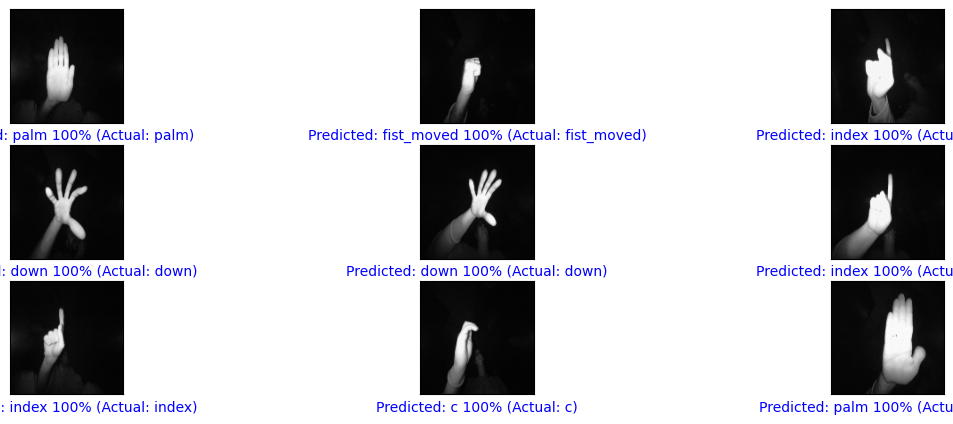

In [21]:
# Plot testing based on predictions and their actual values
validate_gestures(prediction, y_test, X_test)

In [15]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [16]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])

,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,601,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,602,0,0,0,0,0,0,0,0
Actual L,0,0,597,0,0,0,0,0,0,0
Actual Fist (H),0,0,0,608,4,0,0,0,0,0
Actual Fist (V),0,0,0,0,591,0,0,0,0,0
Actual Thumbs up,0,0,0,1,0,568,0,0,0,0
Actual Index,0,0,0,0,0,0,597,0,0,0
Actual OK,0,0,0,0,0,0,0,596,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,618,0
Actual C,0,0,0,0,0,0,0,0,0,617


In [26]:
# Define the path to the image you want to predict
img_path = "C:\\Users\\sucha\\Downloads\\PRODIGY_ML_04\\leapGestRecog\\07\\04_fist_moved\\"

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    print("Image path:", img_path)  # Print the image path for debugging
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Unable to load the image.")
        return None
    print("Image shape:", img.shape)  # Print the image shape for debugging
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img.reshape(1, 128, 128, 1)  # Reshape to match the input shape for the model
    img = img / 255.0  # Normalize pixel values
    return img

# Preprocess the image
img = preprocess_image(img_path)
if img is None:
    print("Exiting due to error.")
    exit(1)

# Load the trained model
model = tf.keras.models.load_model('handgesturerecog_model.h5')

# Make a prediction
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

# Mapping class indices to class names
class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]

# Display the prediction result
print("Predicted label:", class_names[predicted_label])
print("Prediction confidence:", prediction[0][predicted_label])

# Plot the image and the prediction
plt.figure(figsize=(5, 5))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.xlabel(f"Predicted: {class_names[predicted_label]} ({100 * np.max(prediction):.2f}%)")
plt.title("Prediction Result")
plt.show()


Image path: C:\Users\sucha\Downloads\PRODIGY_ML_04\leapGestRecog\07\04_fist_moved\
Error: Unable to load the image.
Exiting due to error.


AttributeError: 'NoneType' object has no attribute 'shape'